#### This Project has been divided into two major parts
- Part I : Scrapping the data from web
- Part II : Working with the Scrapped Data

## Installing necessary Packages & Libraries

In [1]:
#!pip install bs4
#!pip install transformers

In [84]:
from bs4 import BeautifulSoup
import pandas as pd
import csv
import requests as rq
from time import sleep
import re
from selenium import webdriver
import matplotlib.pyplot as plt
import seaborn as sns

# Part I : Scrapping the Data

In [34]:
#Creating a set of lists

titles = []
ratings = []
reviews = []
customers = []
locations_types = [] 
date = []
link =[]

### Scrapping real time data from website

Scrapping customer reviews of Apple iphone 11 from flipkart

Source Link : [Flipkart](https://www.flipkart.com/apple-iphone-11-black-64-gb/p/itm4e5041ba101fd?pid=MOBFWQ6BXGJCEYNY&lid=LSTMOBFWQ6BXGJCEYNYZXSHRJ&marketplace=FLIPKART&q=apple+iphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=Search&iid=d218229e-0b5f-48cd-9ebb-af1b055004cc.MOBFWQ6BXGJCEYNY.SEARCH&ppt=sp&ppn=sp&ssid=794cpc6zcg0000001659531510142&qH=443e995752cbe75b)

![image](https://rukminim1.flixcart.com/image/312/312/k2jbyq80pkrrdj/mobile-refurbished/x/j/s/iphone-11-128-d-mwm02hn-a-apple-0-original-imafkg242ugz8hwc.jpeg?q=70)          

### Beautiful Soup

In [35]:
url = 'https://www.flipkart.com/apple-iphone-11-black-64-gb/p/itm4e5041ba101fd?pid=MOBFWQ6BXGJCEYNY&lid=LSTMOBFWQ6BXGJCEYNYZXSHRJ&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_1&otracker=clp_metro_expandable_8_3.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_92RED14GXPXF_wp2&fm=neo%2Fmerchandising&iid=815205e6-fb72-45fe-b1ef-e27d2d8d4309.MOBFWQ6BXGJCEYNY.SEARCH&ppt=clp&ppn=mobile-phones-store&ssid=gz7ey2c6ps0000001659504709295'
driver = webdriver.Chrome(executable_path="C:/Users/rajag/anaconda3/chromedriver.exe")
driver.maximize_window()
driver.get(url)
r1 = rq.get(url)

soup1 = BeautifulSoup(r1.text, 'html.parser')
driver.execute_script('window.scroll(0,2500)')
sleep(2)

for t in soup1.findAll('a', attrs = {'href': re.compile('/product-reviews/')}):
    q =t.get('href')
    link.append(q)

for i in link:
    if 'LSTMOBFWQ6BXGJCEYNYZXSHRJ' in link:
        print(i)
        aa = i
f_url = ('https://www.flipkart.com'+str(i))
print(f_url)

i=1
while(i<=640):
    ss = driver.get(str(f_url)+'&page='+str(i))
    qq = driver.current_url
    r2 = rq.get(qq)
    soup = BeautifulSoup(r2.text, 'html.parser')
    
    for rating in soup.find_all('div', {'class':'_3LWZlK _1BLPMq'}):
        rate = rating.get_text()
        ratings.append(rate)

    for title in soup.find_all('p', {'class': "_2-N8zT"}):
        head = title.get_text()
        titles.append(head)
    
    for comment in soup.find_all('div', {'class':'t-ZTKy'}):
        text = comment.get_text()
        reviews.append(text)
        
    for cust in soup.find_all('p', {'class':'_2sc7ZR _2V5EHH'}):
        typ = cust.get_text()
        customers.append(typ)
        
    for type_cus in soup.find_all('p',{'class':'_2mcZGG'}):
        cus = type_cus.get_text()
        locations_types.append(cus)
        
    for dt in soup.find_all('p', {'class': '_2sc7ZR'}):
        dat = dt.get_text()
        date.append(dat)
    
    sleep(1)
    i+=1

C:\Users\rajag\AppData\Local\Temp/ipykernel_11204/4018781713.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="C:/Users/rajag/anaconda3/chromedriver.exe")


https://www.flipkart.com/apple-iphone-11-black-64-gb/product-reviews/itm4e5041ba101fd?pid=MOBFWQ6BXGJCEYNY&lid=LSTMOBFWQ6BXGJCEYNYZXSHRJ&marketplace=FLIPKART


### Converting into a Data frame

In [1]:
#name_new = []
#for i in range(0,11796,2):
#    name_new.append(date[i])
    
#date_new = []    
#for i in range(1,11796,2):
#    date_new.append(date[i])

In [2]:
df = pd.DataFrame([ratings,titles,reviews, customers, locations_types, date_new,name_new]).transpose()

In [71]:
df.rename(columns = {0:'Ratings', 1:'Title', 2:'Reviews',3:'Customer', 4:'Location', 5:'Date',6:'Customer_type'}, inplace = True)

In [75]:
df.shape

(5898, 7)

### Saving as a Excel File

In [4]:
df.to_excel("C:/Users/rajag/OneDrive/Desktop/Datasets/Flipkart_reviews.xlsx")

# Part II : Working with the Data

## Reading the Data 

In [3]:
data = pd.read_excel("C:/Users/rajag/OneDrive/Desktop/FILES/Datasets/Flipkart_reviews.xlsx")
data.head()

,Ratings,Title,Reviews,Customer,Location,Date,Customer_type
0,5.0,Brilliant,Amazing experience with iphone i am shfted fr...,Rakesh Jha,"Certified Buyer, Panchkula District","Apr, 2021",Rakesh Jha
1,5.0,Great product,I got super fast delivery in Just 18 hour's. t...,Flipkart Customer,"Certified Buyer, Gaya District","May, 2021",Flipkart Customer
2,5.0,Simply awesome,Really satisfied with the Product I received.....,Flipkart Customer,"Certified Buyer, Mokokchung","Nov, 2020",Flipkart Customer
3,5.0,Perfect product!,Amazing phone with great cameras and better ba...,Flipkart Customer,"Certified Buyer, Hyderabad","Jun, 2020",Flipkart Customer
4,5.0,Best in the market!,Great iPhone very snappy experience as apple k...,Manish Raghuvanshi,"Certified Buyer, Hazaribagh","Apr, 2021",Manish Raghuvanshi


In [4]:
data.shape

(5898, 7)

In [5]:
data.columns

Index(['Ratings', 'Title', 'Reviews', 'Customer', 'Location', 'Date',
       'Customer_type'],
      dtype='object')

## Basic Data Cleaning and Visualization

In [6]:
dummy = data['Location'].str.split(',', n = 1, expand = True)
data['Location'] = dummy[1]
data['Buyer'] = dummy[0]

In [7]:
data.head()

,Ratings,Title,Reviews,Customer,Location,Date,Customer_type,Buyer
0,5.0,Brilliant,Amazing experience with iphone i am shfted fr...,Rakesh Jha,Panchkula District,"Apr, 2021",Rakesh Jha,Certified Buyer
1,5.0,Great product,I got super fast delivery in Just 18 hour's. t...,Flipkart Customer,Gaya District,"May, 2021",Flipkart Customer,Certified Buyer
2,5.0,Simply awesome,Really satisfied with the Product I received.....,Flipkart Customer,Mokokchung,"Nov, 2020",Flipkart Customer,Certified Buyer
3,5.0,Perfect product!,Amazing phone with great cameras and better ba...,Flipkart Customer,Hyderabad,"Jun, 2020",Flipkart Customer,Certified Buyer
4,5.0,Best in the market!,Great iPhone very snappy experience as apple k...,Manish Raghuvanshi,Hazaribagh,"Apr, 2021",Manish Raghuvanshi,Certified Buyer


###  Frequency of Reviews based on 'Date'

Text(0.5, 1.0, 'Frequency of Reviews based on "Date"')

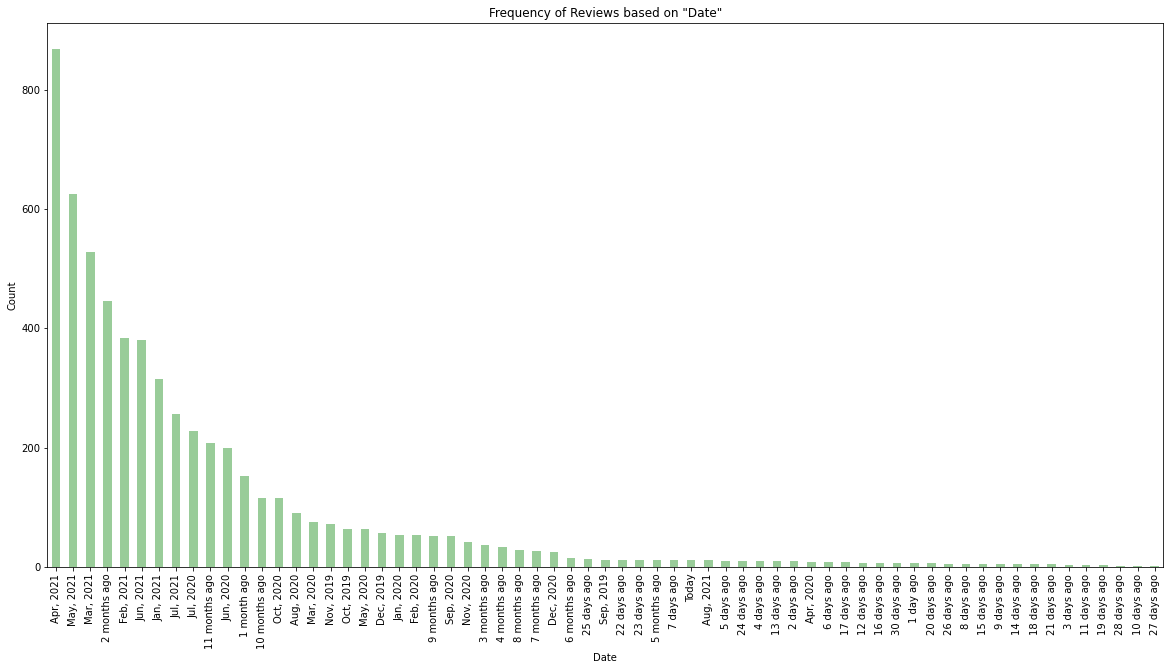

In [472]:
plt.figure(figsize = (20,10))
counts = data['Date'].value_counts().plot(kind = 'bar', color = 'green', alpha = 0.4)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Frequency of Reviews based on "Date"')

#### <div style="text-align: center"> Fig 1.0 : Frequency of Reviews based on Date </div>

## Unique Values

In [9]:
for cols in data:
    print(f'{cols} : {data[cols].nunique()}')

Ratings : 3
Title : 80
Reviews : 4292
Customer : 4415
Location : 1620
Date : 65
Customer_type : 4415
Buyer : 1


### Familiar Title

Text(0.5, 1.0, 'Familair Title')

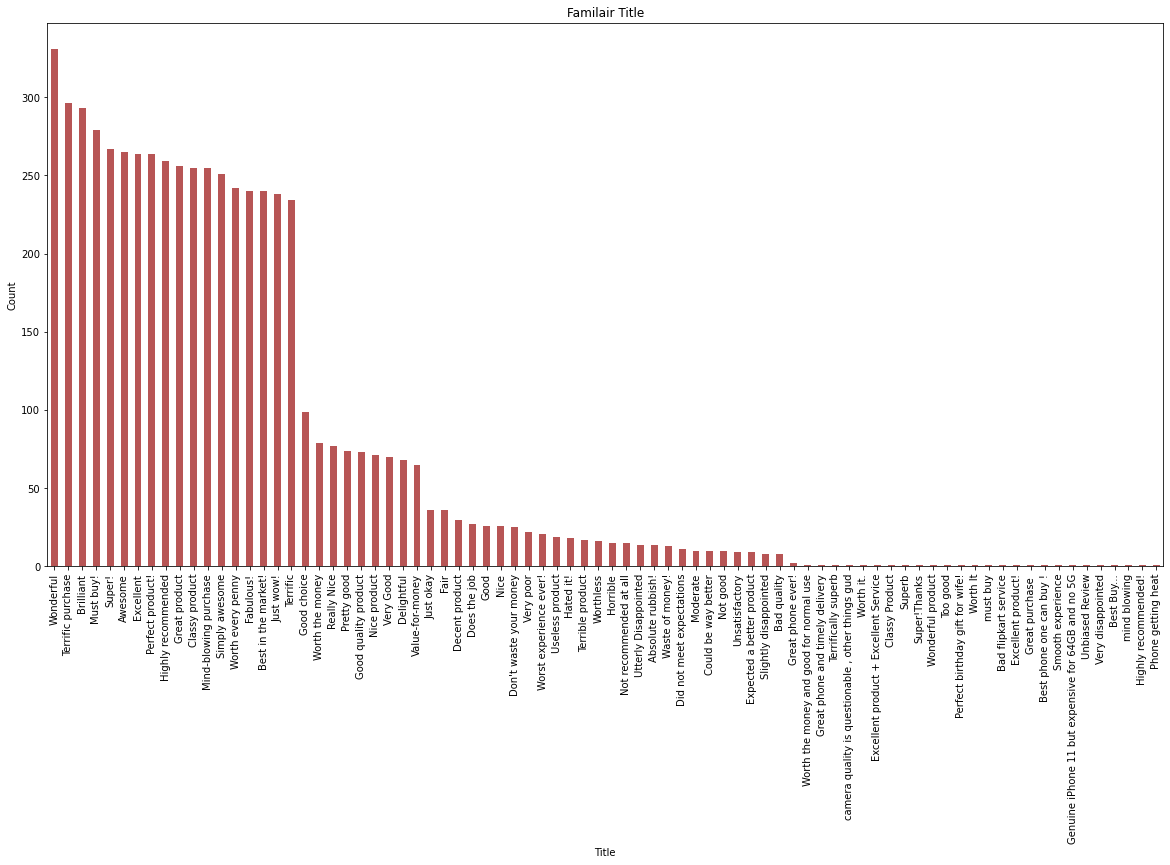

In [504]:
plt.figure(figsize = (20,10))
data['Title'].value_counts().plot(kind ='bar', color = ['brown'], alpha = 0.8)
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Familair Title')

#### <div style="text-align: center"> Fig 1.1 : Familiar Title </div>

#### There is a tag called 'READ MORE' which has been read unfortunately and that has to be removed now

In [14]:
Reviews =  data['Reviews'].apply(lambda x : x.replace('READ MORE',''))

In [107]:
Reviews =  data['Reviews'].apply(lambda x : x.replace('read',''))

In [140]:
Reviews =  data['Reviews'].apply(lambda x : x.replace('READ',''))

In [202]:
for i in Reviews:
    if i.find('READ') == 1:
        print(i)

In [203]:
data['Reviews'] = Reviews

## Text Preprocessing
- Tokenization
- Stop Words Removal
- Stemming
- Lemmatization

### Creating a user defined Preprocessing Fucntion

In [204]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

#Creating a User Defined Function for Text Preprocessing.
def nlp_process(text, stemm =False, lemm = True, Stop_words = False):
    
    #remove numbers and punctuations and lower case
    text = re.sub(r'[^\w\s]','',str(text).lower().strip())
    
    word_tokens = text.split()
    
    #stopwords
    if Stop_words == True:
        lst_text = [word for word in word_tokens if word not in stopwords]
        
    #stemming
    if stemm == True:
        stemmer = nltk.stem.porter.PorterStemmer()
        lst_text = [stemmer.stem(word) for word in lst_text]
    
    #lemmatization
    
    if lemm == True:
        lemmer = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lemmer.lemmatize(word) for word in lst_text]
        
    text = " ".join(lst_text)
    return(text)

In [205]:
data['Review_processed'] = data['Reviews'].apply(lambda x : nlp_process(x, lemm = True, Stop_words = True))

In [206]:
data.head(5)

,Ratings,Title,Reviews,Customer,Location,Date,Customer_type,Buyer,Review_processed,Word_count,Sentiment,Score,Bigrams,Trigrams
0,5.0,Brilliant,Amazing experience with iphone i am shfted fr...,Rakesh Jha,Panchkula District,"Apr, 2021",Rakesh Jha,Certified Buyer,amazing experience iphone shfted android io co...,16,0,0.998784,"[(amazing, experience), (experience, iphone), ...","[(amazing, experience, iphone), (experience, i..."
1,5.0,Great product,I got super fast delivery in Just 18 hour's. t...,Flipkart Customer,Gaya District,"May, 2021",Flipkart Customer,Certified Buyer,got super fast delivery 18 hour thank much tha...,17,1,0.998784,"[(got, super), (super, fast), (fast, delivery)...","[(got, super, fast), (super, fast, delivery), ..."
2,5.0,Simply awesome,Really satisfied with the Product I received.....,Flipkart Customer,Mokokchung,"Nov, 2020",Flipkart Customer,Certified Buyer,really satisfied product received totally genu...,15,1,0.998784,"[(really, satisfied), (satisfied, product), (p...","[(really, satisfied, product), (satisfied, pro..."
3,5.0,Perfect product!,Amazing phone with great cameras and better ba...,Flipkart Customer,Hyderabad,"Jun, 2020",Flipkart Customer,Certified Buyer,amazing phone great camera better battery give...,12,1,0.998784,"[(amazing, phone), (phone, great), (great, cam...","[(amazing, phone, great), (phone, great, camer..."
4,5.0,Best in the market!,Great iPhone very snappy experience as apple k...,Manish Raghuvanshi,Hazaribagh,"Apr, 2021",Manish Raghuvanshi,Certified Buyer,great iphone snappy experience apple kind upgr...,56,1,0.998784,"[(great, iphone), (iphone, snappy), (snappy, e...","[(great, iphone, snappy), (iphone, snappy, exp..."


### Word Count

In [207]:
data['Word_count'] = data['Review_processed'].apply(lambda x: len(str(x).split(' ')))

In [208]:
data.head(5)

,Ratings,Title,Reviews,Customer,Location,Date,Customer_type,Buyer,Review_processed,Word_count,Sentiment,Score,Bigrams,Trigrams
0,5.0,Brilliant,Amazing experience with iphone i am shfted fr...,Rakesh Jha,Panchkula District,"Apr, 2021",Rakesh Jha,Certified Buyer,amazing experience iphone shfted android io co...,15,0,0.998784,"[(amazing, experience), (experience, iphone), ...","[(amazing, experience, iphone), (experience, i..."
1,5.0,Great product,I got super fast delivery in Just 18 hour's. t...,Flipkart Customer,Gaya District,"May, 2021",Flipkart Customer,Certified Buyer,got super fast delivery 18 hour thank much tha...,16,1,0.998784,"[(got, super), (super, fast), (fast, delivery)...","[(got, super, fast), (super, fast, delivery), ..."
2,5.0,Simply awesome,Really satisfied with the Product I received.....,Flipkart Customer,Mokokchung,"Nov, 2020",Flipkart Customer,Certified Buyer,really satisfied product received totally genu...,14,1,0.998784,"[(really, satisfied), (satisfied, product), (p...","[(really, satisfied, product), (satisfied, pro..."
3,5.0,Perfect product!,Amazing phone with great cameras and better ba...,Flipkart Customer,Hyderabad,"Jun, 2020",Flipkart Customer,Certified Buyer,amazing phone great camera better battery give...,11,1,0.998784,"[(amazing, phone), (phone, great), (great, cam...","[(amazing, phone, great), (phone, great, camer..."
4,5.0,Best in the market!,Great iPhone very snappy experience as apple k...,Manish Raghuvanshi,Hazaribagh,"Apr, 2021",Manish Raghuvanshi,Certified Buyer,great iphone snappy experience apple kind upgr...,56,1,0.998784,"[(great, iphone), (iphone, snappy), (snappy, e...","[(great, iphone, snappy), (iphone, snappy, exp..."


### Frequency of Reviews with respect to its word count

Text(0.5, 1.0, 'Word Count')

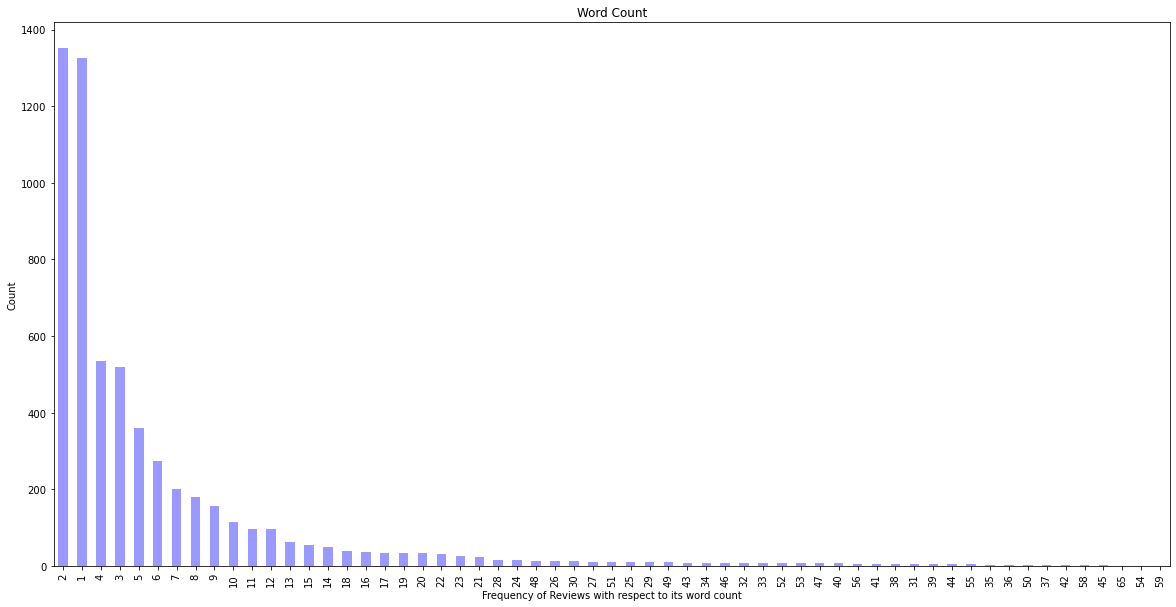

In [474]:
plt.figure(figsize = (20,10))
data['Word_count'].value_counts().plot(kind = 'bar',color = 'blue', alpha = 0.4)
plt.xlabel('Frequency of Reviews with respect to its word count')
plt.ylabel('Count')
plt.title('Word Count')

#### <div style="text-align: center"> Fig 1.2 : Frequency of Reviews with respect to its word count </div>

In [210]:
from nltk import ngrams

In [146]:
twograms = data['Review_processed'].apply(lambda x : ngrams(x.split(),2))

## Sentiment Analysis

Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

These models can be applied on:

- Text, for tasks like text classification, information extraction, question answering, summarization, translation, text generation, in over 100 languages.
- Images, for tasks like image classification, object detection, and segmentation.
- Audio, for tasks like speech recognition and audio classification.

[Documentation](https://pypi.org/project/transformers/#:~:text=%F0%9F%A4%97%20Transformers%20provides%20thousands%20of,generation%2C%20in%20over%20100%20languages.)

In [114]:
from transformers import pipeline

In [115]:
sentiment_analysis = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


### Example

In [116]:
sentiment_analysis('I Love India')

[{'label': 'POSITIVE', 'score': 0.999855637550354}]

Returns a list of dictionary with labels and scores as keys and 'Postive/Negative' with respective score as values

In [147]:
Sent = data['Reviews'].apply(lambda x: sentiment_analysis(x))

In [148]:
Sent1 = Sent.copy()

In [149]:
Sent_new = []
for i in Sent1:
    Sent_new.append(i[0])

In [150]:
Sent_new[:5]

[{'label': 'NEGATIVE', 'score': 0.9765109419822693},
 {'label': 'POSITIVE', 'score': 0.999751627445221},
 {'label': 'POSITIVE', 'score': 0.9997918009757996},
 {'label': 'POSITIVE', 'score': 0.9998601675033569},
 {'label': 'POSITIVE', 'score': 0.9767067432403564}]

The above results are of type list, we need to unlist them and add only values of the dictionary to our DataFrame.

In [151]:
Sent_values = []
for i in Sent_new:
    Sent_values.append(i.values())

#### Unlisted

In [152]:
Sent_values[:5]

[dict_values(['NEGATIVE', 0.9765109419822693]),
 dict_values(['POSITIVE', 0.999751627445221]),
 dict_values(['POSITIVE', 0.9997918009757996]),
 dict_values(['POSITIVE', 0.9998601675033569]),
 dict_values(['POSITIVE', 0.9767067432403564])]

In [153]:
data['Sentiment'] = Sent_values

In [154]:
data['Sentiment'] = data['Sentiment'].apply(lambda x : list(x))

In [155]:
Sentiment = data['Sentiment']

Reaction = []
Score = []

for i in Sentiment:
    Reaction.append(i[0])
    
for j in Sentiment:
    Score.append(i[1])

In [156]:
data['Sentiment'] = Reaction
data['Score'] = Score

### Encoding
- Postive  : 1
- Negative : 0

In [157]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [158]:
data['Sentiment'] = le.fit_transform(data['Sentiment'])
data.head()

,Ratings,Title,Reviews,Customer,Location,Date,Customer_type,Buyer,Review_processed,Word_count,Sentiment,Score,Bigrams,Trigrams
0,5.0,Brilliant,Amazing experience with iphone i am shfted fr...,Rakesh Jha,Panchkula District,"Apr, 2021",Rakesh Jha,Certified Buyer,amazing experience iphone shfted android io co...,16,0,0.998784,"[(amazing, experience), (experience, iphone), ...","[(amazing, experience, iphone), (experience, i..."
1,5.0,Great product,I got super fast delivery in Just 18 hour's. t...,Flipkart Customer,Gaya District,"May, 2021",Flipkart Customer,Certified Buyer,got super fast delivery 18 hour thank much tha...,17,1,0.998784,"[(got, super), (super, fast), (fast, delivery)...","[(got, super, fast), (super, fast, delivery), ..."
2,5.0,Simply awesome,Really satisfied with the Product I received.....,Flipkart Customer,Mokokchung,"Nov, 2020",Flipkart Customer,Certified Buyer,really satisfied product received totally genu...,15,1,0.998784,"[(really, satisfied), (satisfied, product), (p...","[(really, satisfied, product), (satisfied, pro..."
3,5.0,Perfect product!,Amazing phone with great cameras and better ba...,Flipkart Customer,Hyderabad,"Jun, 2020",Flipkart Customer,Certified Buyer,amazing phone great camera better battery give...,12,1,0.998784,"[(amazing, phone), (phone, great), (great, cam...","[(amazing, phone, great), (phone, great, camer..."
4,5.0,Best in the market!,Great iPhone very snappy experience as apple k...,Manish Raghuvanshi,Hazaribagh,"Apr, 2021",Manish Raghuvanshi,Certified Buyer,great iphone snappy experience apple kind upgr...,56,1,0.998784,"[(great, iphone), (iphone, snappy), (snappy, e...","[(great, iphone, snappy), (iphone, snappy, exp..."


### Positive vs Negative Reviews

Text(0, 0.5, 'Count')

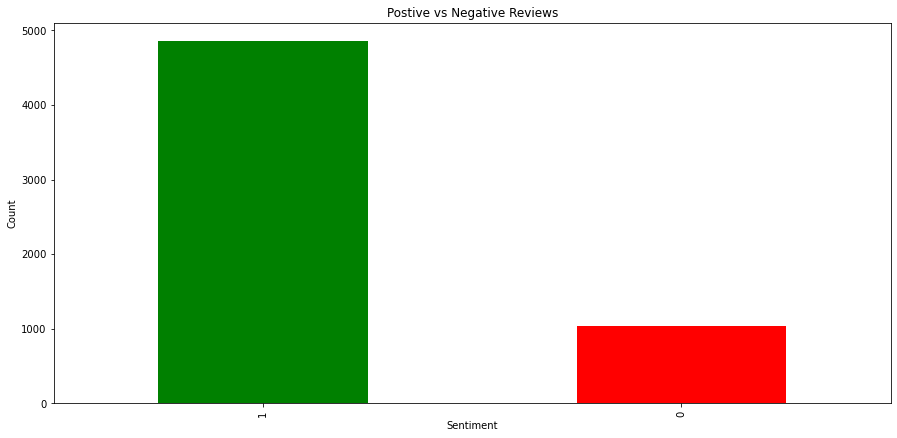

In [480]:
plt.figure(figsize = (15,7))
data['Sentiment'].value_counts().plot(kind = 'bar', color = ['green','red'])
plt.title("Postive vs Negative Reviews")
plt.xlabel('Sentiment')
plt.ylabel('Count')

#### <div style="text-align: center"> Fig 1.3 : Postive vs Negative Reviews</div>

## Word Cloud

In [161]:
#!pip install stylecloud

In [162]:
import stylecloud

In [211]:
text = ''

for var in data['Review_processed']:
    var = str(var)
    tokens = var.split()
    text += " ".join(tokens)+" "

### General Word Cloud

In [491]:
stylecloud.gen_stylecloud(text = text,icon_name="fab fa-apple",palette='colorbrewer.qualitative.Set1_3',background_color='white',gradient='horizontal',)

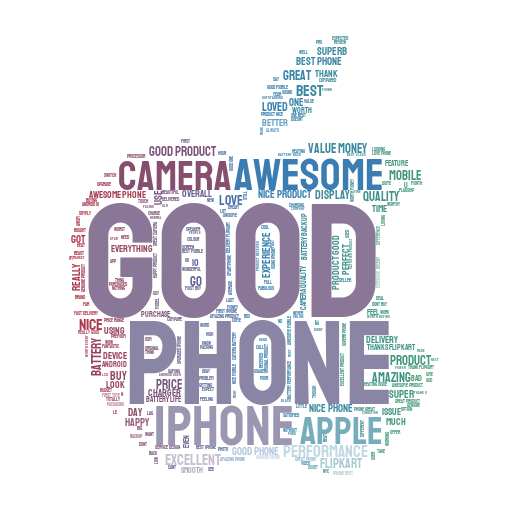

In [493]:
from IPython.display import Image
Image('stylecloud.png', width= 800, height= 400)

#### <div style="text-align: center"> Fig 1.4 : Word Cloud for all Reviews </div>

### THE GREEN APPLE - word cloud for Positive Reviews

In [214]:
pos_text = ''

for var in data[data['Sentiment'] == 1]['Review_processed']:
    var = str(var)
    tokens = var.split()
    pos_text += " ".join(tokens)+" "

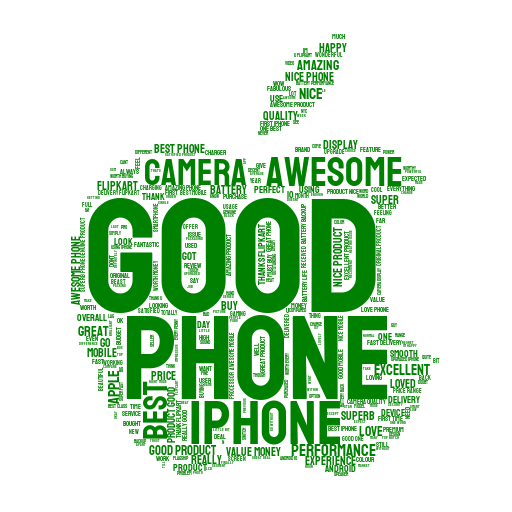

In [494]:
stylecloud.gen_stylecloud(text = pos_text,icon_name="fab fa-apple",colors='green',background_color='white',gradient='horizontal',)
Image('stylecloud.png',width= 800, height= 400)

#### <div style="text-align: center"> Fig 1.5 : Word Cloud for all Positive Reviews </div>

### THE RED APPLE - word cloud for Negative Reviews

In [216]:
neg_text = ''

for var in data[data['Sentiment'] == 0]['Review_processed']:
    var = str(var)
    tokens = var.split()
    neg_text += " ".join(tokens)+" "

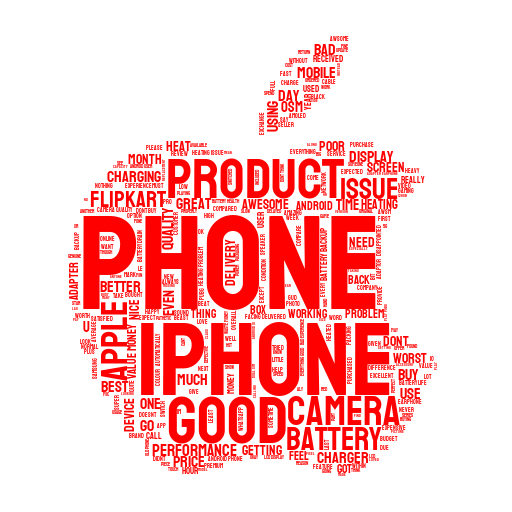

In [495]:
stylecloud.gen_stylecloud(text = neg_text,icon_name="fab fa-apple",colors='red',background_color='white',gradient='horizontal',)
Image('stylecloud.png',width= 800, height= 400)

#### <div style="text-align: center"> Fig 1.6 : Word Cloud for all Negative Reviews </div>

## Ngrams Analysis

In [218]:
from nltk import ngrams
sentence = 'Amazing experience with iphone  i am shfted from android to ios it was complicated to shiftbut after few week of use i am gonna tell you without any thinking go for it '

In [219]:
data['Bigrams'] = data['Review_processed'].apply(lambda x : list(ngrams(x.split(),2)))

In [220]:
data['Trigrams'] = data['Review_processed'].apply(lambda x: list(ngrams(x.split(),3)))

In [221]:
data.head()

,Ratings,Title,Reviews,Customer,Location,Date,Customer_type,Buyer,Review_processed,Word_count,Sentiment,Score,Bigrams,Trigrams
0,5.0,Brilliant,Amazing experience with iphone i am shfted fr...,Rakesh Jha,Panchkula District,"Apr, 2021",Rakesh Jha,Certified Buyer,amazing experience iphone shfted android io co...,15,0,0.998784,"[(amazing, experience), (experience, iphone), ...","[(amazing, experience, iphone), (experience, i..."
1,5.0,Great product,I got super fast delivery in Just 18 hour's. t...,Flipkart Customer,Gaya District,"May, 2021",Flipkart Customer,Certified Buyer,got super fast delivery 18 hour thank much tha...,16,1,0.998784,"[(got, super), (super, fast), (fast, delivery)...","[(got, super, fast), (super, fast, delivery), ..."
2,5.0,Simply awesome,Really satisfied with the Product I received.....,Flipkart Customer,Mokokchung,"Nov, 2020",Flipkart Customer,Certified Buyer,really satisfied product received totally genu...,14,1,0.998784,"[(really, satisfied), (satisfied, product), (p...","[(really, satisfied, product), (satisfied, pro..."
3,5.0,Perfect product!,Amazing phone with great cameras and better ba...,Flipkart Customer,Hyderabad,"Jun, 2020",Flipkart Customer,Certified Buyer,amazing phone great camera better battery give...,11,1,0.998784,"[(amazing, phone), (phone, great), (great, cam...","[(amazing, phone, great), (phone, great, camer..."
4,5.0,Best in the market!,Great iPhone very snappy experience as apple k...,Manish Raghuvanshi,Hazaribagh,"Apr, 2021",Manish Raghuvanshi,Certified Buyer,great iphone snappy experience apple kind upgr...,56,1,0.998784,"[(great, iphone), (iphone, snappy), (snappy, e...","[(great, iphone, snappy), (iphone, snappy, exp..."


## Creating a Corpus

In [292]:
new_text = ''

for var in data['Reviews']:
    var = str(var)
    tokens = var.split()
    new_text += " ".join(tokens)+" "

In [293]:
#Error Backprogated Shell
new_text = new_text.replace('read','')
new_text.find('Read')

-1

In [294]:
corpus = new_text.split()
len(corpus)

59087

In [502]:
corpus[:10]

['Amazing',
 'experience',
 'with',
 'iphone',
 'i',
 'am',
 'shfted',
 'from',
 'android',
 'to']

### Creating a Vocabulary from Corpus

In [295]:
vocab = set(corpus)
print(len(vocab))

7592


In [503]:
print(list(vocab)[:10])

['bezel', 'which', 'androids(Samsung', 'rollout', 'charger.Then', 'pbone', 'open', 'incredible.', 'good.Video', 'watering']


### Counts

In [296]:
bigram_counts = {}
trigram_counts = {}

for i in range(len(corpus)-2):
   
    bigram = (corpus[i],corpus[i+1])
    trigram = (corpus[i], corpus[i+1],corpus[i+2])
  
    if bigram in bigram_counts.keys():
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

    if trigram in trigram_counts.keys():
        trigram_counts[trigram] += 1
    else:
        trigram_counts[trigram] = 1

### Bigram Analysis

In [297]:
Bigram_df = pd.DataFrame()
Bigram_df['Bigram'] = bigram_counts.keys()
Bigram_df['Count'] = bigram_counts.values()
Bigram_df =  Bigram_df.sort_values(by = 'Count', ascending= False)

In [298]:
Bigram_df.head(10)

,Bigram,Count
2707,"(for, money)",144
28,"(go, for)",135
831,"(is, very)",125
629,"(this, phone)",121
434,"(phone, is)",120
233,"(iPhone, 11)",112
6072,"(Very, good)",110
225,"(I, am)",110
532,"(very, good)",107
172,"(is, not)",106


Text(0.5, 1.0, 'Frequency of Top 50 Bigrams')

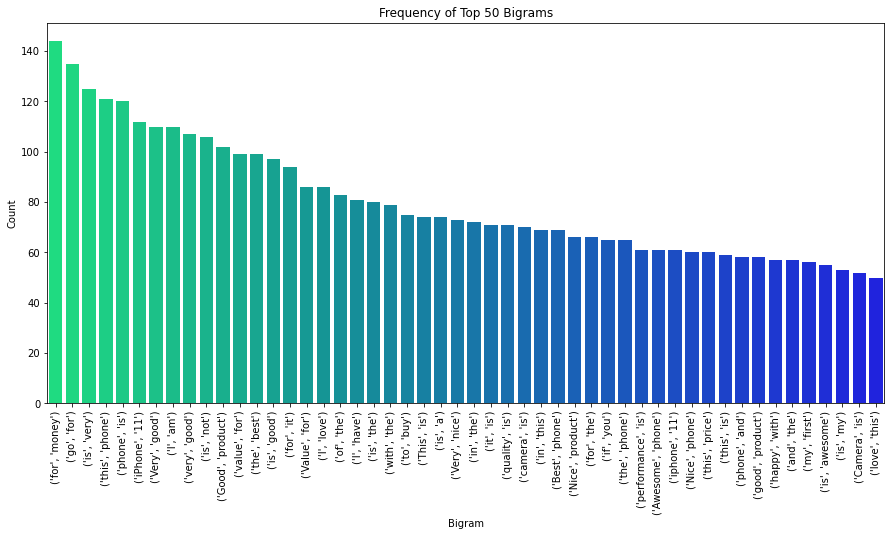

In [497]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
sns.barplot(data=Bigram_df.head(50), x='Bigram', y = 'Count', palette='winter_r')
plt.title('Frequency of Top 50 Bigrams')

#### <div style="text-align: center"> Fig 1.7 : Top 50 highest Frequnecy of Bigrams </div>

### Trigram Analysis

In [300]:
Trigram_df = pd.DataFrame()
Trigram_df['Trigram'] = trigram_counts.keys()
Trigram_df['Count'] = trigram_counts.values()
Trigram_df =  Trigram_df.sort_values(by = 'Count', ascending= False)

In [301]:
Trigram_df.head(10)

,Trigram,Count
3145,"(value, for, money)",63
29,"(go, for, it)",58
6359,"(Value, for, money)",58
308,"(This, is, my)",39
957,"(is, the, best)",35
309,"(is, my, first)",34
1905,"(of, the, best)",29
1194,"(is, very, good)",29
597,"(in, this, price)",27
326,"(I, love, this)",24


Text(0.5, 1.0, 'Frequency of Top 50 Trigrams')

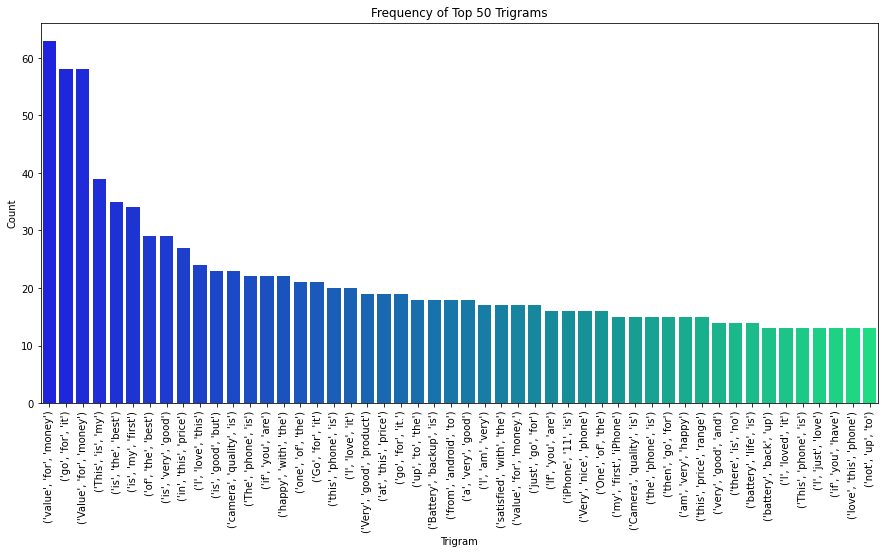

In [498]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
sns.barplot(data=Trigram_df.head(50), x='Trigram', y = 'Count', palette='winter')
plt.title('Frequency of Top 50 Trigrams')

#### <div style="text-align: center"> Fig 1.8 : Frequency of Top 50 Trigrams </div>

## N-Gram Model

- this function has been created based on Bayes Rule 
$P(A|B) = \frac{P(A ∩ B)}{P(B)}$
- Bigram Probability = $P(W_i | W_{i-1}) = \frac{count(W_{i-1}∩ W_i)}{count(W_i-1)}$
- Trigram Probability =  $P(W_i | W_{i-2}, W_{i-1}) = \frac{count(W_{i-2}, W_{i-1})∩ W_i)}{count(W_{i-2}, W_{i-1})}$
    - $W_i$ = Current word
    - $W_{i-1}$ = Previous Word

In [458]:
def recommend(input_):
    
    bigram_counts = {}
    trigram_counts = {}

    for i in range(len(corpus)-2):
    
        bigram = (corpus[i],corpus[i+1])
        trigram = (corpus[i], corpus[i+1],corpus[i+2])
        
        if bigram in bigram_counts.keys():
            bigram_counts[bigram] += 1
        else:
            bigram_counts[bigram] = 1

        if trigram in trigram_counts.keys():
            trigram_counts[trigram] += 1
        else:
            trigram_counts[trigram] = 1
    
    tokenized_input = input_.split()
    last_bigram = tokenized_input[-2:]
    
    vocab_probabilities = {}
    for vocab_word in vocab:
        test_trigram = (last_bigram[0], last_bigram[1], vocab_word)
        test_bigram = (last_bigram[0], last_bigram[1])
        
        
        test_trigram_count = trigram_counts.get(test_trigram, 0)
        test_bigram_count = bigram_counts.get(test_bigram, 0)
        
        probability = test_trigram_count / test_bigram_count
        vocab_probabilities[vocab_word] = probability
      
    top_suggestions = sorted(vocab_probabilities.items(), key=lambda x: x[1], reverse=True)[:5]
    a = top_suggestions
    a = dict(a)
    A = pd.DataFrame()
    A['keys'] = a.keys()
    A['count'] = a.values()
    b = sns.barplot(data =A, x = 'keys', y = 'count', palette = 'ocean')
    return A,b

## Lets try the Recommendation

Give any random string as input. Based the on the Bigrams and Trigrams Count it will return the probable next word based on the Bayes theorem

(       keys     count
 0     money  0.636364
 1    money.  0.171717
 2    money,  0.030303
 3  money...  0.020202
 4   money..  0.020202,
 <AxesSubplot:xlabel='keys', ylabel='count'>)

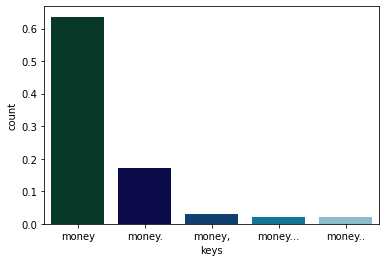

In [459]:
recommend('value for')

#### <div style="text-align: left">Fig 1.9 : Next word suggestions for the string 'value for'</div>

(      keys     count
 0  product  0.048611
 1        I  0.048611
 2     Very  0.041667
 3     Good  0.034722
 4      and  0.027778,
 <AxesSubplot:xlabel='keys', ylabel='count'>)

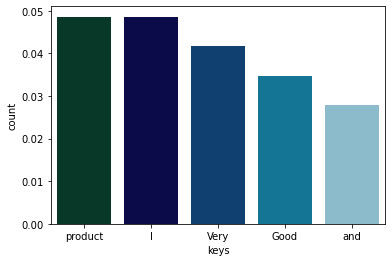

In [460]:
recommend('value for money')

#### <div style="text-align: left">Fig 2.0 : Next word suggestions for the string 'value for money'</div>

(      keys     count
 0     very  0.131148
 1  awesome  0.049180
 2      not  0.049180
 3      too  0.049180
 4     good  0.049180,
 <AxesSubplot:xlabel='keys', ylabel='count'>)

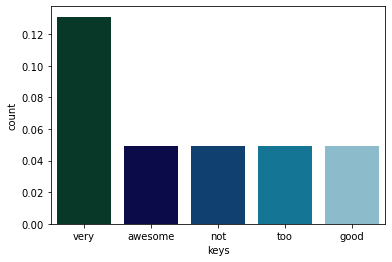

In [461]:
recommend('performance is')

#### <div style="text-align: left">Fig 2.1 : Next word suggestions for the string 'performance is'</div>

(    keys  count
 0   good  0.232
 1  good.  0.064
 2   nice  0.040
 3   fast  0.040
 4   very  0.040,
 <AxesSubplot:xlabel='keys', ylabel='count'>)

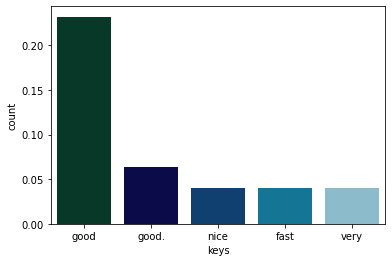

In [462]:
recommend('performance is very')

#### <div style="text-align: left">Fig 2.2 : Next word suggestions for the string 'performance is very'</div>

(      keys     count
 0       is  0.259259
 1  quality  0.222222
 2        .  0.111111
 3  picture  0.074074
 4      the  0.074074,
 <AxesSubplot:xlabel='keys', ylabel='count'>)

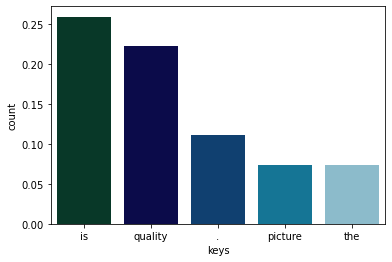

In [467]:
recommend('the camera')

#### <div style="text-align: left">Fig 2.3 : Next word suggestions for the string 'the camera'</div>

(      keys     count
 0      not  0.140845
 1     very  0.126761
 2  awesome  0.070423
 3     good  0.070423
 4     next  0.056338,
 <AxesSubplot:xlabel='keys', ylabel='count'>)

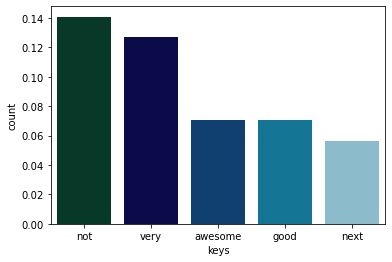

In [501]:
recommend('the camera quality is')

#### <div style="text-align: left">Fig 2.4 : Next word suggestions for the string 'the camera quality is'</div>

<div style="text-align: left"><p> Rajagopal.S <br> M.Sc. Data Analytics </p> </div>